### Load tensorflow

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
#Train the model
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Collect Data

In [ ]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.cifar10.load_data()

In [ ]:
trainX.shape

(50000, 32, 32, 3)

### Convert Output label to multiple values

In [ ]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [ ]:
#trainX=trainX/255
#testX=testX/255    # standardize the data for train and test to be between 0-1

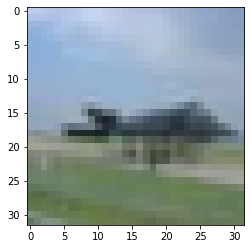

In [ ]:
# Show one of the images from the training dataset
import matplotlib.pyplot as plt
plt.imshow(trainX[600])

In [ ]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((32,32,3),input_shape=(32,32,3,)))
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [ ]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
# Add third convolutional layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
#Add fourth convolutional layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))


### Add layers for Classification

In [ ]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
#model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0

## Train the model

In [ ]:
#Train the model
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20,
          batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7768 - accuracy: 0.4727 - val_loss: 1.2336 - val_accuracy: 0.5883
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0965 - accuracy: 0.6303 - val_loss: 0.9831 - val_accuracy: 0.6617
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9000 - accuracy: 0.6882 - val_loss: 0.7959 - val_accuracy: 0.7277
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8009 - accuracy: 0.7246 - val_loss: 0.6983 - val_accuracy: 0.7667
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7359 - accuracy: 0.7435 - val_loss: 0.7128 - val_accuracy: 0.7531
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6824 - accuracy: 0.7654 - val_loss: 0.6260 - val_accuracy: 0.7861
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6253 - accuracy: 0.7837 - val_loss: 0.6302 - val_ac

In [ ]:
model.save('demo.h5')